In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from insolation_model import vis
from insolation_model.geometry.shading import (
    _make_shade_mask_from_horizontal_wave_front,
)

project_root = Path.cwd().parent  # Go up from dev directory
sys.path.insert(0, str(project_root))


from tests.conftest import make_flat_dem

In [2]:
n_rows, n_cols = 80, 120

dem = make_flat_dem(n_rows=n_rows, n_cols=n_cols)

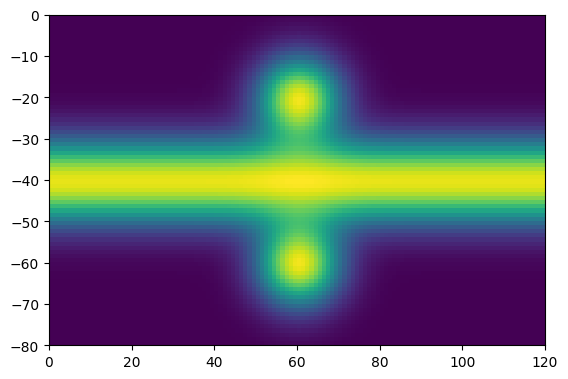

<Axes: >

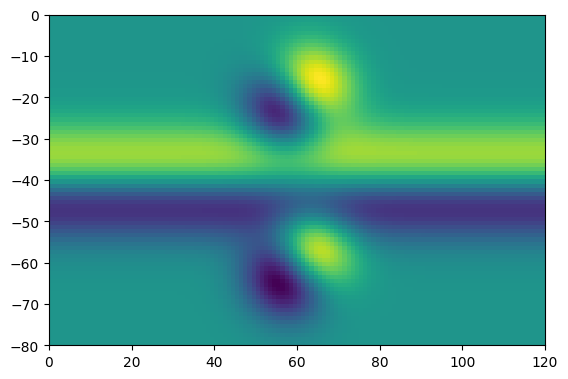

In [14]:
# make a hill
y = np.arange(n_rows)
hill = np.exp(-((y - n_rows / 2) ** 2) / 10**2)
hill = hill[:, np.newaxis]
hill = np.tile(hill, (1, n_cols))

hill_dem = dem.with_array(hill)

# and some mounds
X, Y = np.meshgrid(np.arange(n_cols), np.arange(n_rows))


def make_mound(xc, yc, radius):
    return np.exp(-((X - xc) ** 2 + (Y - yc) ** 2) / radius**2)


mound_centers = [(n_cols / 2, n_rows / 4), (n_cols / 2, 3 * n_rows / 4)]
mounds = sum(make_mound(xc, yc, 10) for xc, yc in mound_centers)

mounds_dem = dem.with_array(mounds)


# and combine
dem = dem.with_array(hill + mounds)
vis.raster(dem)
plt.show()
vis.hillshade(dem, solar_azimuth=45, solar_elevation=45)

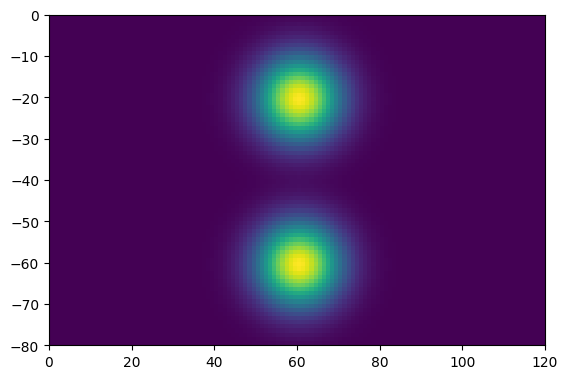

<Axes: >

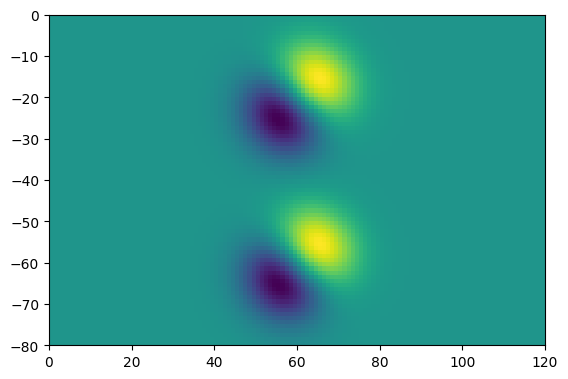

0


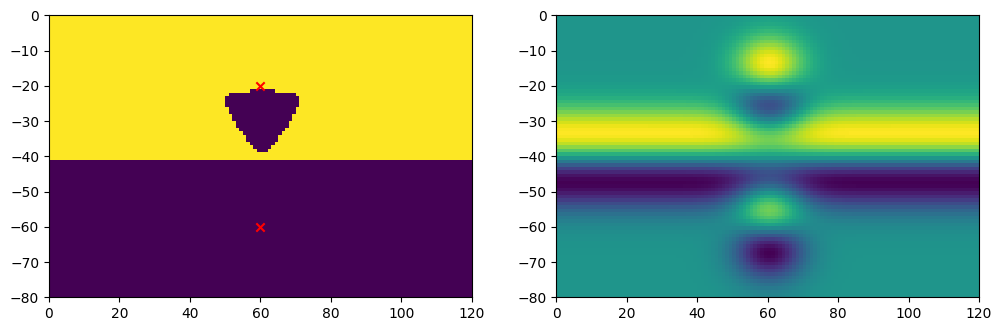

10


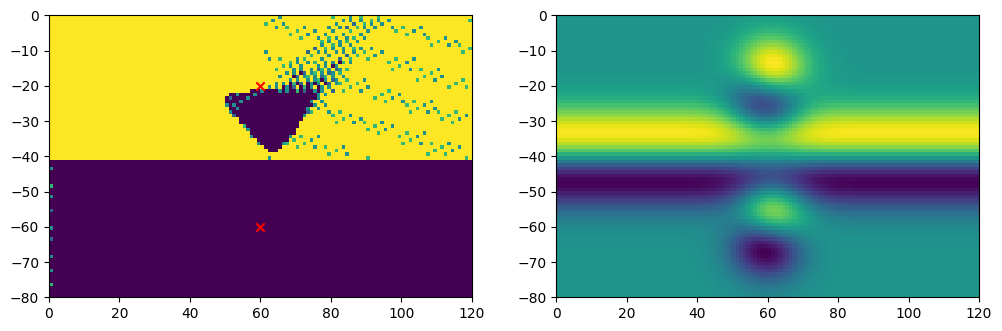

30


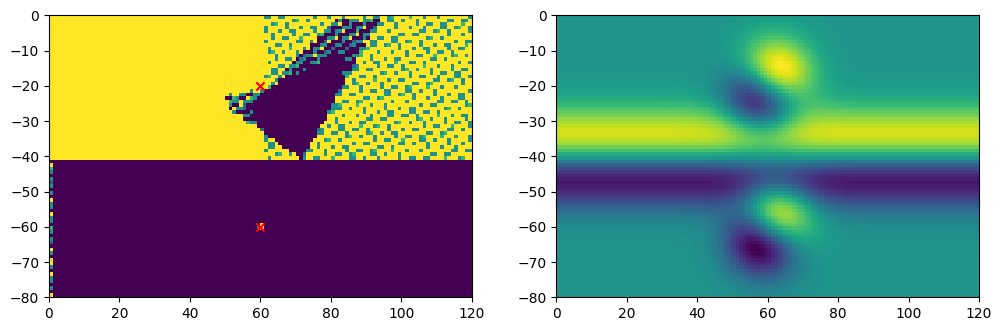

40


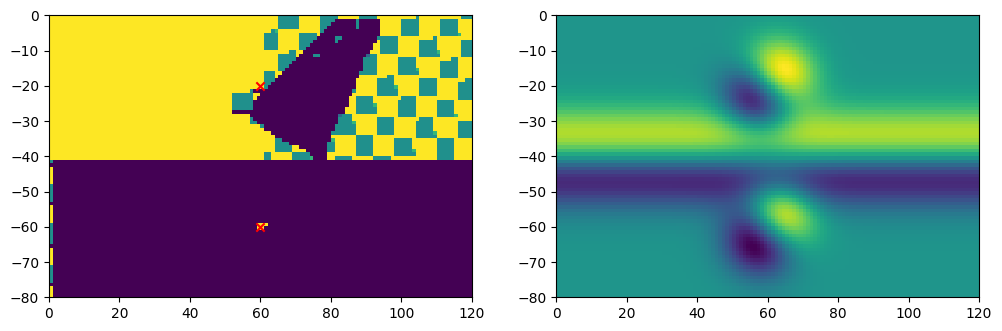

45


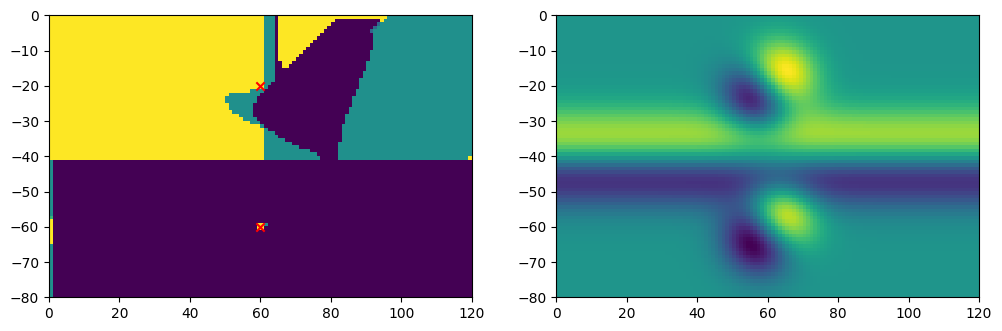

In [18]:
for az in [0, 10, 30, 40, 45]:
    print(az)
    shade_mask = _make_shade_mask_from_horizontal_wave_front(dem, az)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    vis.raster(dem.with_array(-shade_mask), ax=axes[0])
    for mound_center in mound_centers:
        axes[0].scatter(mound_center[0], -mound_center[1], color="red", marker="x")
    vis.hillshade(dem, solar_azimuth=az, solar_elevation=45, ax=axes[1])
    plt.show()